In [1]:
import pickle, os, torch
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm
from corner import corner, overplot_lines
cols_t = [r'$M_*$', r'$M_{cold}$', r'$Z_{gas}$', r'$SFR$', r'$SFR_{100}$', r'$M_{BH}$']

In [2]:
font = {'family' : 'Serif',
        'weight' : 'normal',
        'size'   : 15}

fontdict = {'family' : 'Serif',
        'weight' : 'normal',
        'size'   : 11}

mpl.rc('font', **font)


## Normal residual corner plot

In [3]:
# this is the correlated run
folder = 'results_final_Z_270322'
run= 'Sage_vlarge_all_allt_z0.0_quantile_raw_rm_msdgfh_1_2'

folder = 'results_final_Z_300322'
run= 'Sage_vlarge_all_allt_z0.0_quantile_raw_rm_mllteo'

pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}')    
results=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
config=pickle.load(open(osp.join(pointer,'construct_dict.pkl'), 'rb'))
ys, pred = results['low_ys'], results['low_pred']
mstar_ys, mstar_pred = ys[:,0]+9, pred[:,0]+9

Zy, Zpred = ys[:,2]+9, pred[:,2]+9
Coldy, Coldpred = ys[:,1]+9, pred[:,1]+9
sfr_ys, sfr_pred = ys[:,3], pred[:,3]
sfr100_ys, sfr100_pred = ys[:,4], pred[:,4]
Mbh_ys, Mbh_pred = ys[:,5]+9, pred[:,5]+9

Zy-=Coldy
Zpred-=Coldpred

ys = np.vstack([ mstar_ys, Coldy, Zy, sfr_ys, sfr100_ys, Mbh_ys]).T
pred = np.vstack([mstar_pred, Coldpred, Zpred, sfr_pred, sfr100_pred, Mbh_pred]).T

res = ys-pred

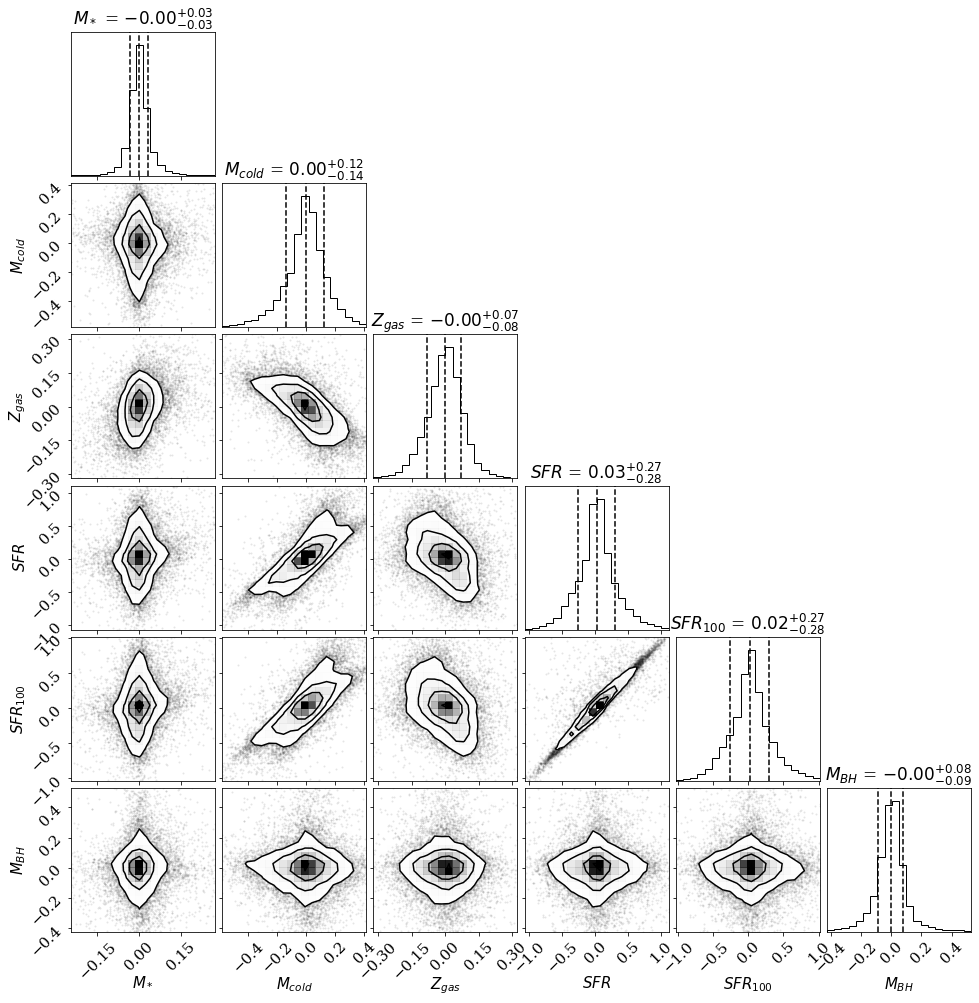

In [4]:
l=0.99
fig = corner(res, labels=cols_t,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 17}, range = [l]*6)

In [5]:
from scipy.stats import linregress
axes = fig.axes
ass, bss = [], []
for i in range(6):
    for j in range(i+1,6):
        ob = linregress(res[:,i], res[:,j])
        a = ob.slope
        b = ob.intercept
        ass.append(a)
        bss.append(b) 
        rs = np.linspace(min(res[:,i]), max(res[:,i]), 100)
        axes[i+j*6].plot(rs, a*rs+b, 'k-')
        if a>0:
            axes[i+j*6].text(0.7,0.15, f'a: {a:.2f}', fontdict=fontdict, transform= axes[i+j*6].transAxes)
            axes[i+j*6].text(0.7,0.05, f'b: {b:.2f}', fontdict=fontdict, transform= axes[i+j*6].transAxes)
        else:
            axes[i+j*6].text(0.05,0.15, f'a: {a:.2f}', fontdict=fontdict, transform= axes[i+j*6].transAxes)
            axes[i+j*6].text(0.05,0.05, f'b: {b:.2f}',fontdict=fontdict, transform= axes[i+j*6].transAxes)
#         axes[i+(j-1)*6].text(0.1,0.8, f'slope: {i}, {j}, {i+j*6}')

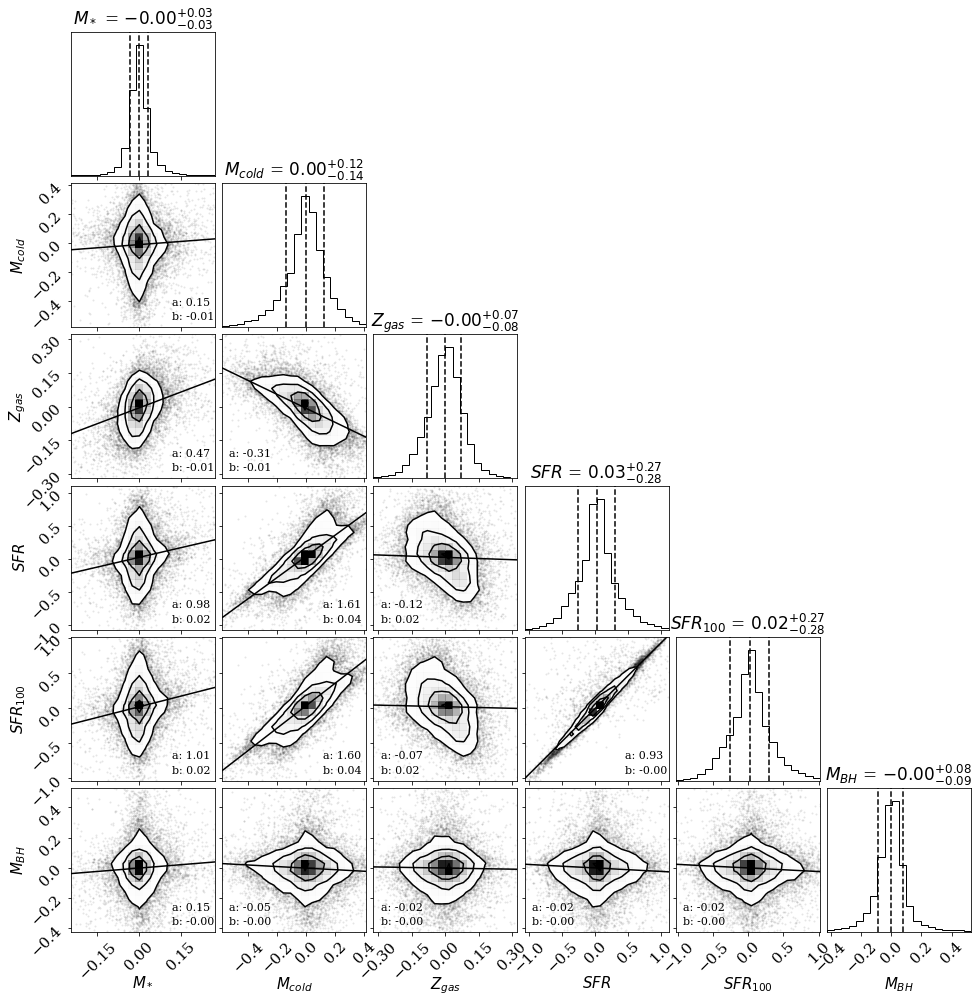

In [6]:
fig.savefig('../paper_figures/residual_corner.png')
fig

## Residual figure in units of residual sigmas

In [7]:
# this is the correlated run
folder = 'results_final_Z_270322'
run= 'Sage_vlarge_all_allt_z0.0_quantile_raw_rm_msdgfh_1_2'

folder = 'results_final_Z_300322'
run= 'Sage_vlarge_all_allt_z0.0_quantile_raw_rm_mllteo'

pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}')    
results=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
config=pickle.load(open(osp.join(pointer,'construct_dict.pkl'), 'rb'))
ys, pred = results['low_ys'], results['low_pred']
mstar_ys, mstar_pred = ys[:,0]+9, pred[:,0]+9

Zy, Zpred = ys[:,2]+9, pred[:,2]+9
Coldy, Coldpred = ys[:,1]+9, pred[:,1]+9
sfr_ys, sfr_pred = ys[:,3], pred[:,3]
sfr100_ys, sfr100_pred = ys[:,4], pred[:,4]
Mbh_ys, Mbh_pred = ys[:,5]+9, pred[:,5]+9

Zy-=Coldy
Zpred-=Coldpred

ys = np.vstack([ mstar_ys, Coldy, Zy, sfr_ys, sfr100_ys, Mbh_ys]).T
pred = np.vstack([mstar_pred, Coldpred, Zpred, sfr_pred, sfr100_pred, Mbh_pred]).T

res = ys-pred

res/=np.std(res, axis=0)
res-= np.mean(res, axis=0)

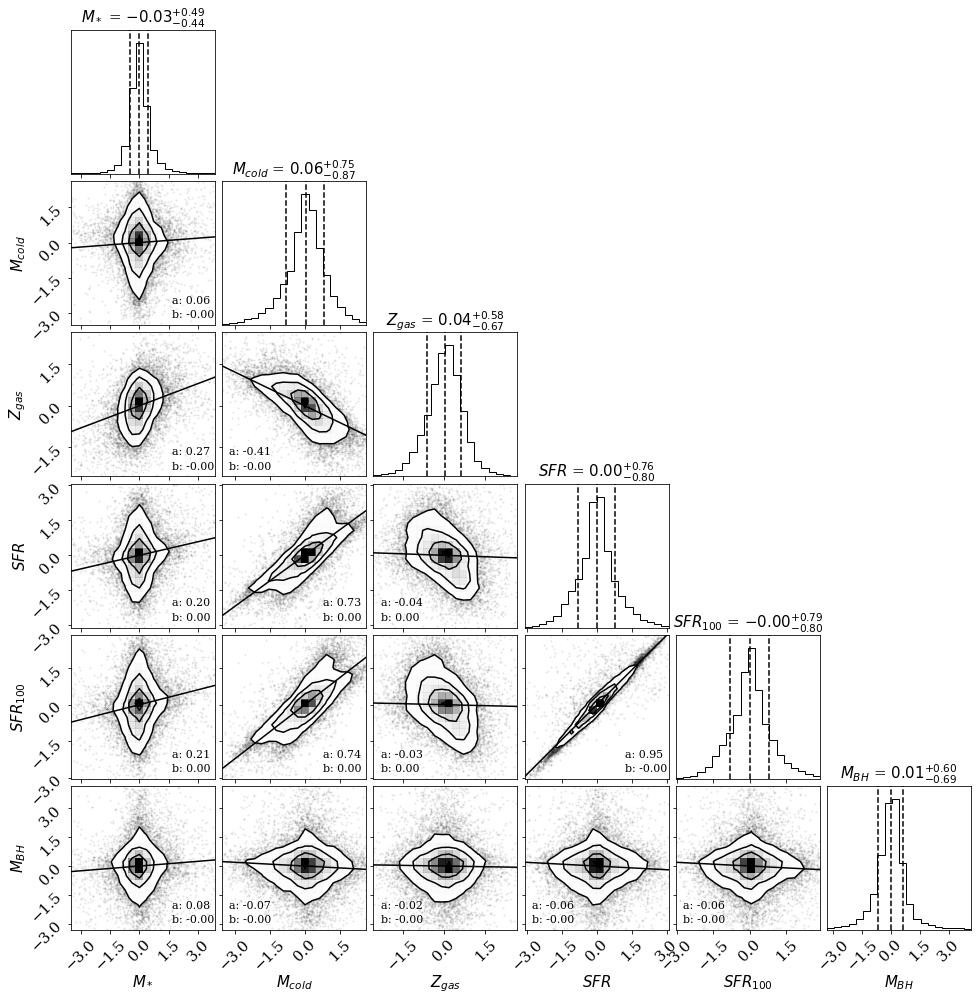

In [8]:
l=0.99
fig = corner(res, labels=cols_t,
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 15}, range = [l]*6)
from scipy.stats import linregress
axes = fig.axes
ass, bss = [], []
for i in range(6):
    for j in range(i+1,6):
        ob = linregress(res[:,i], res[:,j])
        a = ob.slope
        b = ob.intercept
        ass.append(a)
        bss.append(b) 
        rs = np.linspace(min(res[:,i]), max(res[:,i]), 100)
        axes[i+j*6].plot(rs, a*rs+b, 'k-')
        if a>0:
            axes[i+j*6].text(0.7,0.15, f'a: {a:.2f}', fontdict=fontdict, transform= axes[i+j*6].transAxes)
            axes[i+j*6].text(0.7,0.05, f'b: {b:.2f}', fontdict=fontdict, transform= axes[i+j*6].transAxes)
        else:
            axes[i+j*6].text(0.05,0.15, f'a: {a:.2f}', fontdict=fontdict, transform= axes[i+j*6].transAxes)
            axes[i+j*6].text(0.05,0.05, f'b: {b:.2f}',fontdict=fontdict, transform= axes[i+j*6].transAxes)
#         axes[i+(j-1)*6].text(0.1,0.8, f'slope: {i}, {j}, {i+j*6}')
fig.savefig('../paper_figures/std_residual_corner.png')